# <font color='#GGE15D'>**Clustering: Kmeans**</font>

## **🔸 Imports**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import *

from mlxtend.plotting import plot_decision_regions

## **🔸 Datasets**

<font color='#EE15D'> **Note: This assignment contains 4 datasets. Example 1 is the Mall Customers dataset. Examples 2, 3, and 4 are three generated datasets.**

### Example 1

In [9]:
X = pd.read_csv('/content/Mall_Customers.csv')
X.columns = ['customer_id', 'gender', 'age', 'annual_income', 'spending_score']
X = X.drop('customer_id', axis=1)
X['gender'] = X['gender'].map({'Male': 0, 'Female': 1})
display(X.head())


X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

X_train = X_train.values
X_test = X_test.values

X_train.shape, X_test.shape

,gender,age,annual_income,spending_score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


((160, 4), (40, 4))

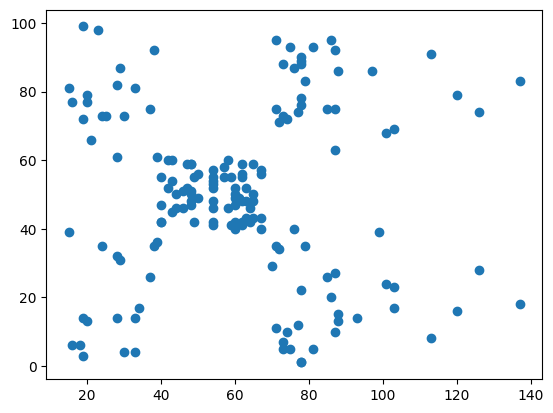

In [10]:
plt.scatter(X_train[:, -2], X_train[:, -1])

### Example 2

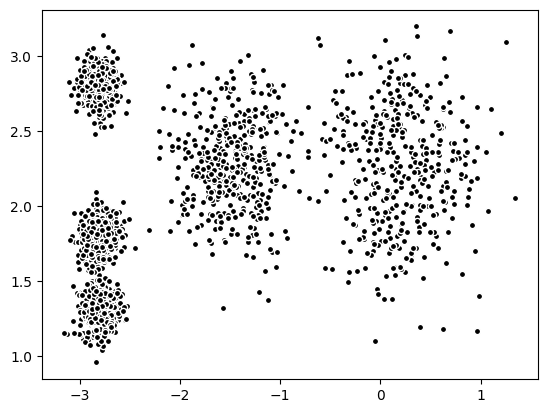

In [11]:
blob_centers = np.array([[ 0.2,  2.3],
                         [-1.5,  2.3],
                         [-2.8,  1.8],
                         [-2.8,  2.8],
                         [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X2, y2 = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.scatter(X2[:, 0], X2[:, 1], s=20, c='black', edgecolor='white')

### Example 3

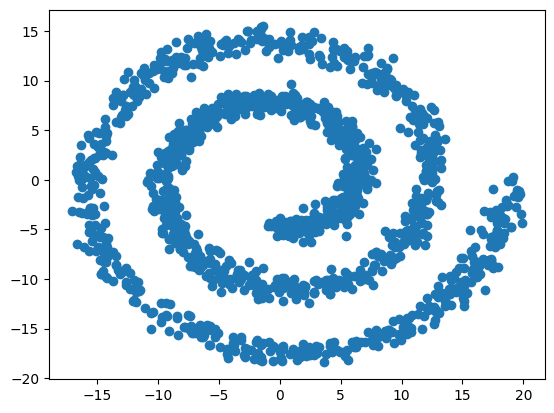

In [12]:
n_samples = 1500
np.random.seed(0)

t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X3 = np.concatenate((x, y))
X3 += 0.7 * np.random.randn(2, n_samples)
X3 = X3.T

plt.scatter(X3[:, 0], X3[:, 1])

### Example 4

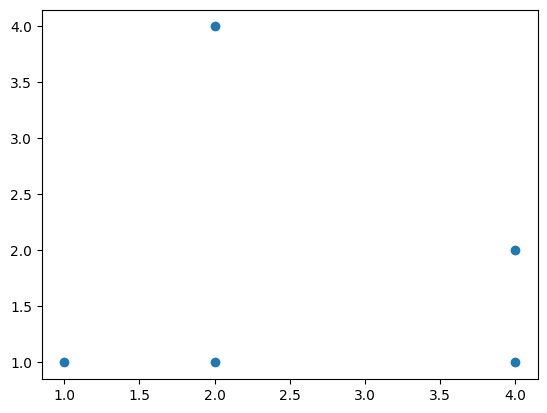

In [71]:
X4 = np.array([[1, 1], [2, 4], [2, 1], [4, 1], [4, 2]])

plt.scatter(X4[:, 0], X4[:, 1])

## **🔸 K-means**

### sklearn

In [16]:
cols = ['gender', 'age', 'annual_income', 'spending_score']
idx = [2, 3]
X = X_train[:, idx].copy()

<font color='#EE15D'>**Question1: Import Kmeans, Consider 3 different numbers of clusters: 2, 3, and 5 on X dataset. Finally, visualize the results and compare the plots.**

Answer 1: When we test KMeans with different numbers of clusters on the dataset X, we see that with 2 clusters we get a rough division between low and high spending/income. With 3 clusters, clearer segments emerge, where the average value cluster is separated from high and low values. With 5 clusters, the most detailed customer segments are captured, including combinations of low/high income and spending, although it becomes somewhat more complex. The conclusion is therefore that 5 clusters provide the best segmentation for this dataset.

In [66]:
from sklearn.cluster import KMeans

# Question 1
n = 2  #numbers of clusters
kmeans = KMeans (n_clusters=n, random_state=0)     #complete this code

kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
labels.shape, centroids.shape

((160,), (2, 2))

In [67]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Xm = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Xm = Xm.reshape(xx.shape)

Text(0, 0.5, 'spending_score')

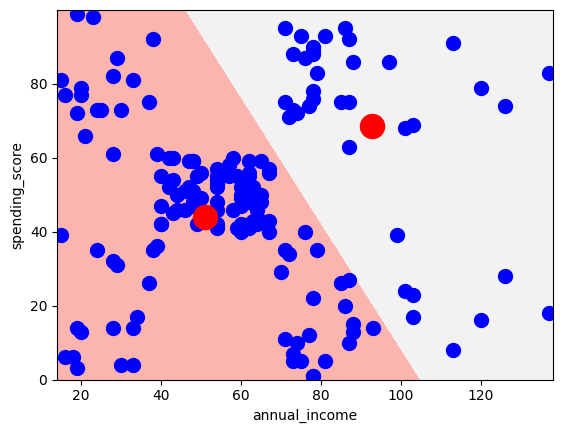

In [68]:
plt.contourf(xx, yy, Xm, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], s=100, c='blue')
plt.scatter(centroids[: , 0], centroids[: , 1], s=300, c='red')

plt.xlabel(cols[idx[0]])
plt.ylabel(cols[idx[1]])


Text(0, 0.5, 'spending_score')

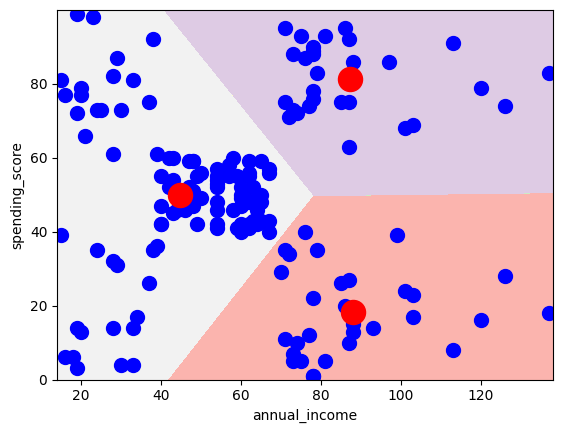

In [69]:
# Question 1
n = 3  #numbers of clusters
kmeans = KMeans (n_clusters=n, random_state=0)     #complete this code

kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
labels.shape, centroids.shape

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Xm = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Xm = Xm.reshape(xx.shape)

plt.contourf(xx, yy, Xm, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], s=100, c='blue')
plt.scatter(centroids[: , 0], centroids[: , 1], s=300, c='red')

plt.xlabel(cols[idx[0]])
plt.ylabel(cols[idx[1]])


Text(0, 0.5, 'spending_score')

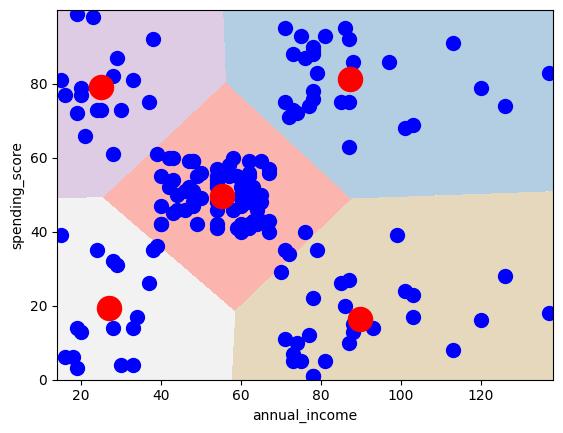

In [70]:
# Question 1
n = 5  #numbers of clusters
kmeans = KMeans (n_clusters=n, random_state=0)     #complete this code

kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
labels.shape, centroids.shape

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Xm = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Xm = Xm.reshape(xx.shape)

plt.contourf(xx, yy, Xm, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], s=100, c='blue')
plt.scatter(centroids[: , 0], centroids[: , 1], s=300, c='red')

plt.xlabel(cols[idx[0]])
plt.ylabel(cols[idx[1]])


## **🔸 Elbow & Silhouette**

<font color='#EE15D'> **Question2: Elbow: Write code to compute and plot the elbow curve for the X dataset. Your final plot should match the provided output. Determine where the elbow point is.**

Answer 2: The elbow curve for the X dataset levels off around K = 3-4, indicating the optimal number of clusters. This means that 3-4 clusters best capture the structure of the data.  

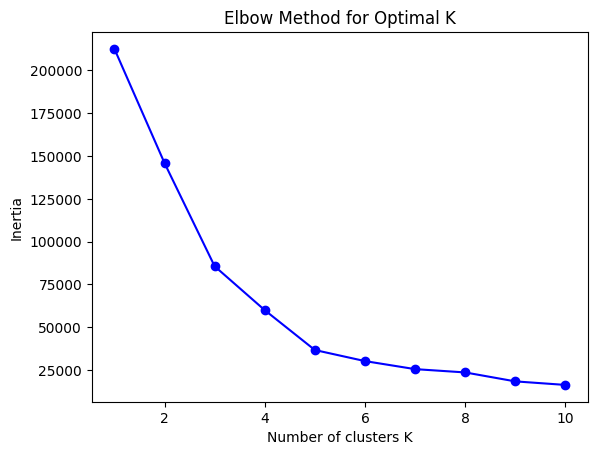

In [20]:
# Question 2
inertia = []
K = range (1, 11)
for k in K:
  km = KMeans(n_clusters=k, random_state=0)
  km.fit(X)
  inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

### Silhouette score

<font color='#EE15D'> **Question3: Calculate sillhoutte score**

In [72]:
# Question 3
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

score = silhouette_score(X, labels)
print(score)

0.4684683908215398


## **🔸 Hierarchical Clustering**

### Example 1

<font color='#EE15D'> **Question4: Use AgglomerativeClustering of Sklearn with 5 clusters, fit on X2 data and plot it. You just need to complete agg code line**

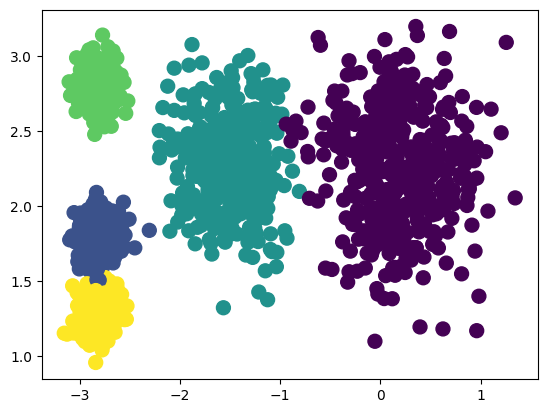

In [23]:
# Question 4
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5)   #complete this code
agg.fit(X2)

labels = agg.labels_

plt.scatter(X2[:, 0], X2[:, 1], s=100, c=labels);


### Example 2

<font color='#EE15D'> **Question5: Apply AgglomerativeClustering on X data with 5 clusters, switch linkage between 'ward', 'single', and 'complete' and compare the plotts. Which is a better method?**

In [24]:
# Question 5
cols = ['gender', 'age', 'annual_income', 'spending_score']
idx = [2, 3]
X = X_train[:, idx].copy()

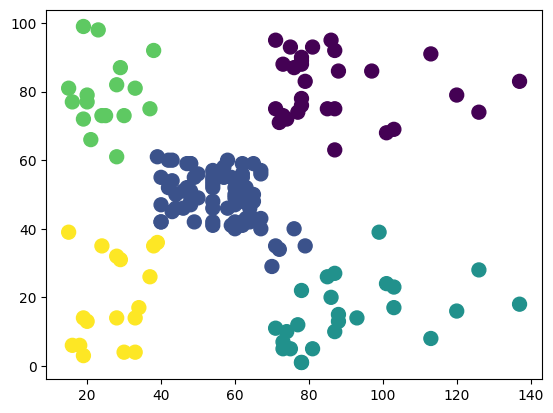

In [26]:
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')   #complete this code
agg.fit(X)

labels = agg.labels_

plt.scatter(X[:, 0], X[:, 1], s=100, c=labels);


### Example 3

<font color='#EE15D'> **Question6: Apply AgglomerativeClustering on X3 data with 4 clusters, and linkage = 'ward', finally visualize it**

In [ ]:
# Question 6
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')  #complete this code
agg.fit(X3)

labels = agg.labels_

plt.scatter(X3[:, 0], X3[:, 1], s=100, c=labels);

### Dendrogram (Optional, Extra point)

For extra points, you can plot a dendrogram using Agglomerative Clustering on the X4 dataset by applying the function provided in the following link.

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

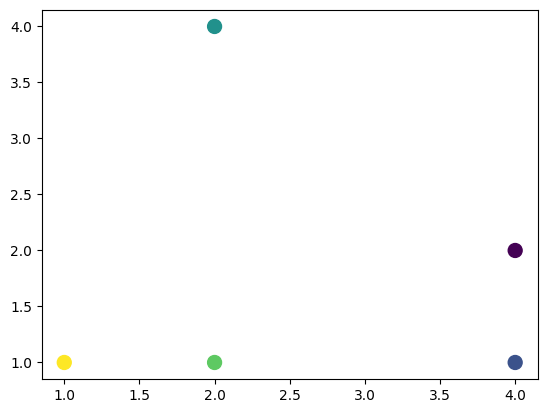

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Extra
agg = AgglomerativeClustering(n_clusters=None, distance_threshold=0)  #complete this code
agg.fit(X4)

labels = agg.labels_

plt.scatter(X4[:, 0], X4[:, 1], s=100, c=labels);

Text(0, 0.5, 'Distance')

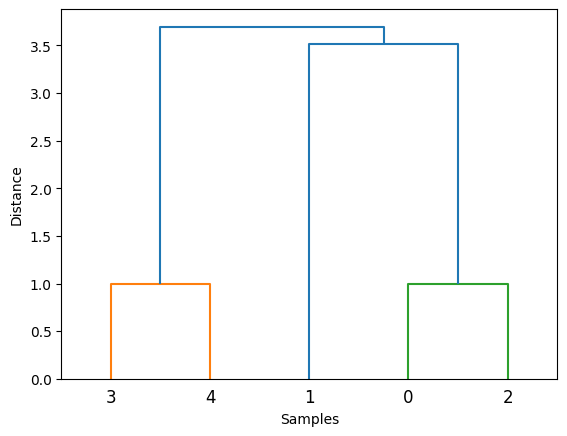

In [30]:
# Plot Dendrogram
linked = linkage(X4, 'ward')                         #complete this
dendrogram(linked)
plt.xlabel('Samples')
plt.ylabel('Distance')
